In [1]:
# 완전연결계층에 의한 변환 파이썬 

import numpy as np

c = np.array([1,0,0,0,0,0,0]) # 입력
W = np.random.randn(7,3) # 가중치
h = np.matmul(c, W) # 중간 노드

print(h)
# 단어 ID가 0인 단어를 원핫 표현으로 표현핫 다음 완전연결계층을 통과시켜 변환한다.
# 행렬의 곱은 np.matmul()이 계산해준다.

[0.75076731 0.03159126 1.64418941]


In [2]:
# 완전연결계층에 의한 변환 파이썬 
import sys
sys.path.append('..')
import numpy as np
from layers import MatMul

c = np.array([1,0,0,0,0,0,0]) # 입력
W = np.random.randn(7,3) # 가중치
layer = MatMul(W)
h = layer.forward(c) # 중간 노드

print(h)


[-0.78872809  0.36612651  1.75636805]


In [4]:
# CBOW 모델 신경망 구현

import sys
sys.path.append('..')
import numpy as np
from layers import MatMul

# 샘플 맥락 데이터
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

# 가중치 초기화
W_in = np.random.rand(7,3)
W_out = np.random.rand(3,7)


# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0+h1)
s = out_layer.forward(h)


print(s)


[[0.62000754 0.97476165 1.07179513 0.91084964 0.59519604 0.60545939
  0.49261965]]


In [6]:
import sys
sys.path.append('..')
from util import preprocess

text = 'You say goodbye I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 1 4 5]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'i', 4: 'hello', 5: '.'}


In [7]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

In [8]:
contexts, target = create_contexts_target(corpus, window_size=1)

print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 1]
 [3 4]
 [1 5]]
[1 2 3 1 4]


In [9]:
import sys
sys.path.append('..')
from util import preprocess, create_contexts_target, convert_one_hot

text =  'You say goodbye I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [17]:
# CBOW 모델의 신경망 구현

import sys
sys.path.append('..')
import numpy as np
from layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [18]:
def forward(self, contexts, target):
    h0 = self.in_layer0.forward(contexts[:, 0])
    h1 = self.in_layer1.forward(contexts[:, 1])
    h = (h0+h1) * 0.5
    score = self.out_layer.forward(h)
    loss = self.loss_layer.forward(score, target)
    
    return loss

In [19]:
# 역전파
def backward(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    
    return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 346 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 347 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 348 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 358 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 359 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 360 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 361 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 362 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 363 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 364 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 365 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 366 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 367 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 368 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 369 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 370 |  반복 1

| 에폭 696 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 697 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 698 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 699 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 700 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 701 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 702 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 703 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 704 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 705 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 706 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 707 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 708 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 709 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 710 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 711 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 712 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 713 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 714 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 715 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 716 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 717 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 718 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 719 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 720 |  반복 1

C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\as_th\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from curre

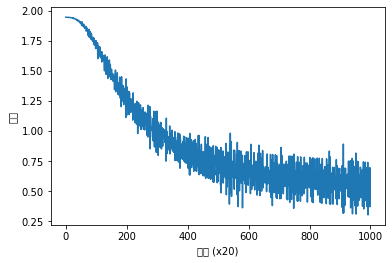

you [ 1.3681369 -1.14042    1.1120733  1.1421809  1.0410815]
say [-0.46442395  1.3143436  -1.1401856  -0.49635255 -1.3312315 ]
goodbye [ 0.46182564 -0.7135161   0.9755459   0.7443927   0.82085997]
and [-1.5344739   1.1262337  -0.21229285 -1.6127471  -1.1438191 ]
i [ 0.47632876 -0.72274673  0.9982545   0.77820253  0.84890735]
hello [ 1.3293796 -1.126231   1.0988526  1.1602651  1.0420338]
. [ 1.5482944  1.1204406 -1.1760596  1.6331223 -1.1340734]


In [20]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from trainer import Trainer
from optimizer import Adam
from util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])